In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import sys 
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install cntk-gpu

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
from keras import backend as K
import os
from importlib import reload

import cntk
print(cntk.__version__)
from cntk.device import try_set_default_device, gpu
# try_set_default_device(gpu(0))
cntk.logging.set_trace_level(2)

print(cntk.all_devices()) 

def set_keras_backend(backend):
    if K.backend() != backend: 
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend
        
set_keras_backend("cntk")

2.5.1
(GPU[0] Tesla K80, CPU)


In [22]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 12, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
# Next we;ll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))
# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# We can add as many layers as we think necessary - here we'll add another convolution, max pooling, and dropout layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(units = 12, activation='softmax'))

# With the layers defined, we can ow compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('gear_images_train', target_size = (64, 64), batch_size = 16, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('gear_images_test', target_size = (64, 64), batch_size = 16, class_mode = 'categorical')

classifier.fit_generator(training_set, steps_per_epoch = 400, epochs = 10, validation_data = test_set, validation_steps = 100)


Found 2122 images belonging to 12 classes.
Found 120 images belonging to 12 classes.
Epoch 1/10
400/400 [==============================] - 47s 117ms/step - loss: 1.2972 - acc: 0.2152 - val_loss: 1.2343 - val_acc: 0.0831
Epoch 2/10
400/400 [==============================] - 46s 116ms/step - loss: 0.9077 - acc: 0.2213 - val_loss: 0.9737 - val_acc: 0.1090
Epoch 3/10
400/400 [==============================] - 48s 119ms/step - loss: 0.6433 - acc: 0.4646 - val_loss: 0.2597 - val_acc: 0.8584
Epoch 4/10
400/400 [==============================] - 48s 121ms/step - loss: 0.2305 - acc: 0.9114 - val_loss: 0.0484 - val_acc: 0.9920
Epoch 5/10
400/400 [==============================] - 48s 119ms/step - loss: 0.1720 - acc: 0.9394 - val_loss: 0.1252 - val_acc: 0.9581
Epoch 6/10
400/400 [==============================] - 48s 119ms/step - loss: 0.1291 - acc: 0.9514 - val_loss: 0.0151 - val_acc: 0.9920
Epoch 7/10
400/400 [==============================] - 47s 117ms/step - loss: 0.1016 - acc: 0.9625 - val_l

In [39]:
cato = {0: 'axes', 1: 'boots', 2: 'carabiners', 3: 'crampons', 4: 'gloves', 5: 'hardshell_jackets', 6: 'harnesses', 7: 'helmets', 8: 'insulated_jackets', 9: 'pulleys', 10: 'rope', 11: 'tents'}

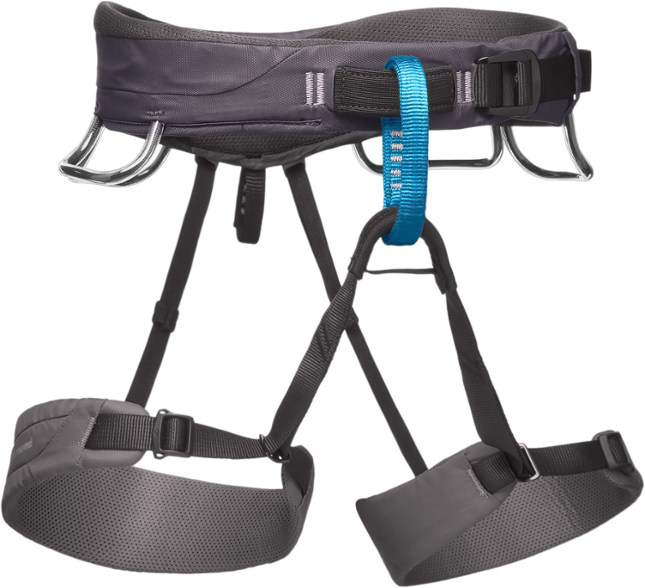

In [24]:
import requests
from PIL import Image, ImageOps
from io import BytesIO


testImageUrl="https://www.rei.com/media/bba3dec6-9cfc-4d98-860f-9c3192cae4c2?size=784x588"
response = requests.get(testImageUrl)
testImage = Image.open(BytesIO(response.content))
testImage

In [54]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('harness.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
training_set.class_indices
print(result, result[0][0])
cato[result.argmax()]


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 0.0


'harnesses'

In [41]:
cato[result.argmax()]

'harnesses'

In [53]:
testImageUrl="https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg"
response = requests.get(testImageUrl)
testImage = Image.open(BytesIO(response.content))

from PIL import Image
r = requests.get(testImageUrl)
b = BytesIO(r.content)

test_image = image.load_img(b, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
training_set.class_indices
print(result, result[0][0])
cato[result.argmax()]

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] 0.0


'helmets'

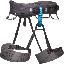

In [50]:
test_image = image.load_img('harness.jpg', target_size = (64, 64))

test_image